<a href="https://colab.research.google.com/github/muhammedkoussa/ChestDiseaseDetection/blob/main/ChestDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uyarı mesajlarını görmezden gelmek için

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Kaggle Python kütüphanesini yükledik.





In [ ]:
!pip install kaggle



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*Kaggle API kullanabilmek için google drive tanımladık.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

Kaggle'den indirip drive yükledğimiz JSON doyasını kopyaladık.


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:25<00:00, 41.2MB/s]
100% 2.29G/2.29G [00:25<00:00, 97.9MB/s]


In [ ]:
!unzip chest-xray-pneumonia

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: che

Gerekli olan kütüphanelerin import edilmesi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

* NumPy çok boyutlu dizileri, matrisleri ve üst düzey matematiksel işlevler ekleyen bir kitaplıktır
* MatPlotLib  görselleştirme kütüphanesidir.
* Os modülü Python'da hazır olarak gelen , dosya ve dizinlerde kolaylıkla işlemler yapmamızı sağlayan bir modüldür.
* math modülü matematiksel işlemler yapmanızı kolaylaştırmak için yazılmış bir modüldür.
* Shutil dizinler üzerinde bulunan dosyaları kopyalama , taşıma , açma, okuma , yazma ve kapatma gibi işlemleri “OS” modülü ile beraber basitçe yapmamızı sağlayan bir Python modülüdür.
* Glob modülü, Python'da belirli bir klasör içindeki dosyaları listelememize yardımcı olan harika bir modüldür. Bu modülü kullanırken filtreleme yaparak, sadece istenilen dosyaların listelenmesini de sağlayabiliyoruz.

Kaggle'dan alınan veriler DataSet adlı klasörde toplandı

In [ ]:
os.mkdir("DataSet")

In [ ]:
os.mkdir("DataSet/yes")

In [ ]:
os.mkdir("DataSet/no")

In [ ]:
import os
import shutil
# Colab'da boş bir klasör oluşturun

source_dir = '/content/chest_xray/train/PNEUMONIA'
target_dir = '/content/DataSet/yes'

file_names = os.listdir(source_dir)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)




In [ ]:
source_dir = '/content/chest_xray/train/NORMAL'
target_dir = '/content/DataSet/no'

file_names = os.listdir(source_dir)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

DataSette kaç adet resim bulunduğunu tespit eden kod

In [ ]:
ROOT_DIR = "/content/DataSet"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('no', 1341), ('yes', 3875)])

#veriyi şöyle ayırdık
* Train için %70
* Validation %15
* Test %15

Bu kod, verilen ROOT_DIR dizininin altındaki tüm dizinlerden rastgele seçilmiş resimleri belirtilen split oranına göre ikiye ayırır ve ayırdığı resimleri iki ayrı klasöre kopyalar.

In [ ]:
def dataFolder(p, split):

#Train için klasör oluşturduk
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
       os.makedirs("./"+p+"/"+dir)

       for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)) ,
                                size=(math.floor(split*number_of_images[dir])-5),
                                replace=False ):
         O = os.path.join(ROOT_DIR,dir,img) #path
         D = os.path.join("./"+p,dir)
         shutil.copy(O,D)
         os.remove(O)

  else:
    print(f"{p} Bu Dosya Mevcuttur")

In [ ]:
dataFolder("train" , 0.7)

In [ ]:
dataFolder("val" , 0.15)

In [ ]:
dataFolder("test" , 0.15)

***MODEL OLUŞTURMA ***

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras


Bu kodlar Keras kütüphanesindeki bazı modülleri içe aktarır.

Conv2D: 2 boyutlu bir evrişim (convolution) katmanı oluşturmak için kullanılır. Bu katman, görüntülerdeki özellikleri çıkarmak için filtreler kullanır.

MaxPool2D: 2 boyutlu bir maksimum havuzlama (pooling) katmanı oluşturmak için kullanılır. Bu katman, özellik haritalarındaki boyutu küçültür ve hesaplama maliyetini azaltır.

Dropout: Dropout katmanı, ağın aşırı uyuma (overfitting) yapmasını önlemek için kullanılır. Bu katman, rastgele seçilen nöronları devre dışı bırakarak ağın genelleştirme performansını artırır.

Flatten: Düzleştirme (flatten) katmanı, özellik haritalarını tek boyutlu bir vektöre dönüştürmek için kullanılır.

Dense: Tam bağlantılı (fully connected) katman oluşturmak için kullanılır.

BatchNormalization: Batch normalization katmanı, verileri ortalaması sıfır, varyansı bir ve normal dağılım gösteren şekilde ölçeklemek için kullanılır. Bu, ağın daha hızlı öğrenmesine ve aşırı uyum yapmasının önlenmesine yardımcı olur.

GlobalAvgPool2D: Global ortalama havuzlama katmanı, özellik haritasını küçültmek için kullanılır ve ağı daha hızlı hale getirir. Bu katman, her özellik haritasının ortalama değerini alır ve sonuç olarak bir özellik vektörü oluşturur.

Sequential modülü, bir Keras modelini oluşturmak için kullanılır ve

ImageDataGenerator modülü, görüntü verilerinin yüklenmesi ve önişleme yapılması için kullanılır. keras modülü ise Keras kütüphanesinin ana modülüdür ve çeşitli işlevleri içerir.

CNN MODEL

#Eğitilmemiş boş model oluşturuyoruz

Bu kodlar, bir evrişimli sinir ağı (Convolutional Neural Network - CNN) oluşturur. CNN, görüntülerdeki özellikleri tanımak için kullanılan bir derin öğrenme modelidir.

Bu CNN modeli, 224x224 boyutunda renkli görüntü verilerini girdi olarak alır ve bir sınıflandırma görevi gerçekleştirir. Model, 3 evrişimli katmana sahiptir, ardından birkaç tam bağlantılı katman gelir. Bu katmanlardan bazıları, aşırı uyum yapmayı önlemek için dropout işlemini uygular.

Conv2D katmanları, verilen filtre sayısı ve boyutuyla, girdi görüntülerindeki özellikleri öğrenir. Ardından MaxPool2D katmanları, özellik haritalarının boyutunu küçültmek için maksimum havuzlama işlemi uygular. Dropout katmanları, ağın aşırı uyuma yapmasını önlemek için bir rastgele atma işlemi uygular.

Model, son olarak Flatten katmanıyla düzleştirilir ve birkaç tam bağlantılı katmana aktarılır. Bu katmanlar, ağı sınıflandırma işlemi için hazırlar ve sigmoid aktivasyon fonksiyonu kullanarak sonuç üretir.

model.summary() işlevi, modelin özetini yazdırır ve her katmanın boyutunu, parametre sayısını ve katmandaki aktivasyon fonksiyonunu görüntüler.

In [ ]:
from keras.backend import dropout
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters= 36 , kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64,kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128 , kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))
model.add(Flatten())
model.add(Dense(units=64,activation= 'relu'))

model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

modeli eğitmek için kullanacagımız önceden eğitilmiş ağı seçtik

data generator kullanarak verilerimizi hazırlıyoruz

verinin dataseti hazırlanılyor

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input

dosya yolundan verilerin veriseti olarak hazırlanması ve gereken boyutlama işleme yaplıyor.

In [ ]:
def preprocessingImages1(path):
  """"
input : Path
output Pre processed images
"""
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, preprocessing_function=preprocess_input, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

Bu kodlar, verilen bir dizindeki görüntüleri önceden işleme işlevi kullanarak önceden işler ve ImageDataGenerator nesnesi döndürür.

Fonksiyon, ImageDataGenerator sınıfını kullanarak verileri artırır ve önişleme işlemleri yapar. Bu işlemler, verilerin ağa verilmeden önce uygun formatta olmasını sağlar.

zoom_range ve shear_range parametreleri, resimleri rastgele olarak yakınlaştırır ve keser. preprocess_input fonksiyonu, keras.applications modülünden bir önişleme işlevi olabilir ve resimleri ağırlıkların öğrenilebileceği uygun formatta yeniden boyutlandırır ve normalleştirir. horizontal_flip parametresi, resimleri yatay olarak rastgele çevirir.

Fonksiyon, verilen dizindeki resimleri yükler ve uygun hale getirir. flow_from_directory fonksiyonu, dizindeki resimleri batch_size boyutunda yığınlar halinde yükler. target_size parametresi, görüntülerin yeniden boyutlandırılacağı hedef boyutu belirtir. class_mode parametresi, sınıflandırma türünü belirtir.

Son olarak, önişlenmiş veriler image adlı bir nesne olarak döndürülür. Bu nesne, görüntü verilerinin yığınlara ayrılmış şekilde yüklenmesine izin verir.

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3640 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

test verisini orjinalliğine koruyarak dataset oluşturuyor.

In [ ]:
def preprocessingImages2(path):
  """"
input : Path
output Pre processed images
"""
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input )
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 772 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 772 images belonging to 2 classes.


Model Eğitimi

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

Hızlı ve Güç tüketimi düşük bu tarz verilerde en yüksek doğruluk oranı veren MobileNet

In [ ]:
base_model = MobileNet (input_shape=(224,224,3), include_top= False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
   layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=1 ,activation='sigmoid')(X)
model = Model(base_model.input, X)

In [ ]:
model. summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

# **Model Gösterimi**

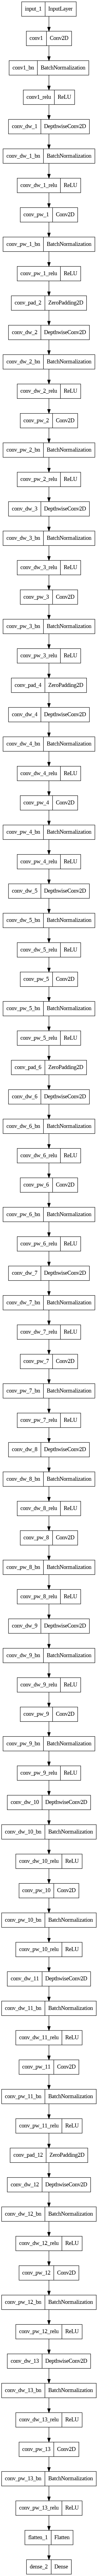

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Bu şekilde derlenen bir model, optimize edici olarak Adam optimizasyon algoritmasını kullanacak, binary crossentropy kayıp fonksiyonunu minimize etmeye çalışacak ve eğitim sırasında doğruluk metriğiyle modelin performansını değerlendirecektir.




In [ ]:
model.compile(optimizer='Adam', loss= keras.losses.binary_crossentropy , metrics=['accuracy'])

In [ ]:
#Call Back
from keras.callbacks import ModelCheckpoint, EarlyStopping
# model Check point
mc=ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
#Early Stopping 5 kere improve olmazsa model.fit duraklar
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=7, verbose=1)
cb = [mc,es]


In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=6,
                         epochs=30,
                         verbose=1,
                         validation_data= val_data,
                         validation_steps= 10,
                         callbacks= cb)

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 0.0982 - accuracy: 0.9688
Epoch 1: val_accuracy improved from 0.96562 to 0.98125, saving model to bestmodel.h5
6/6 [==============================] - 57s 10s/step - loss: 0.0982 - accuracy: 0.9688 - val_loss: 0.0730 - val_accuracy: 0.9812
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9740
Epoch 2: val_accuracy did not improve from 0.98125
6/6 [==============================] - 33s 6s/step - loss: 0.1097 - accuracy: 0.9740 - val_loss: 0.0946 - val_accuracy: 0.9781
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9583
Epoch 3: val_accuracy did not improve from 0.98125
6/6 [==============================] - 35s 6s/step - loss: 0.1931 - accuracy: 0.9583 - val_loss: 0.1938 - val_accuracy: 0.9688
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.1569 - accuracy: 0.9792
Epoch 4: val_accuracy did not improve from 0.98125
6/6 [=======

In [ ]:
#en iyi modeli yükleme
model = load_model("/content/bestmodel.h5")

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"our model accuracy is {acc*100} % ")

our model accuracy is 97.66839146614075 % 


# Yeni Bölüm

In [ ]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

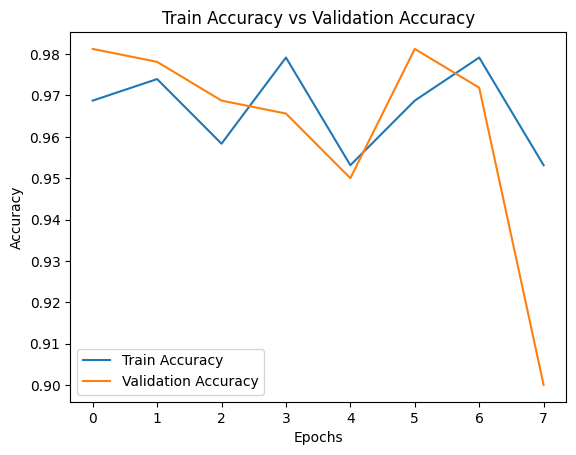

In [ ]:
plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.title("Train Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

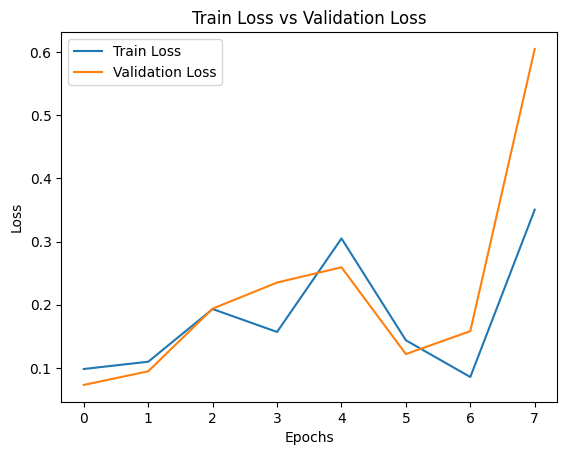

In [ ]:
plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.title("Train Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image

1/1 [==============================] - 0s 101ms/step
[[0.99999994]]
1/1 [==============================] - 0s 62ms/step
[[1.]]
Bu MR Görüntüsünde Hastalık Tespit Edilmiştir.


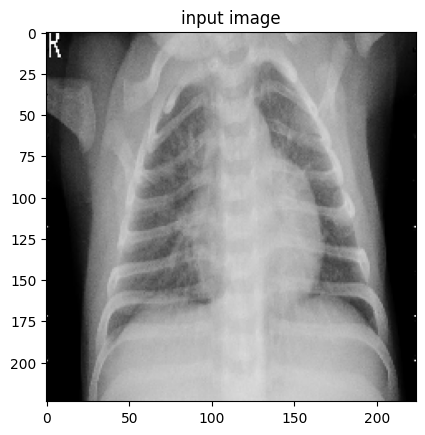

In [ ]:

# path for the image to see if it predics correct class
path = "/content/test/yes/person1040_virus_1735.jpeg"
img = tf.keras.utils.load_img(path, target_size=(224,224) )

i = tf.keras.utils.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape
pred = np.round_(model.predict(input_arr))

print(model.predict(input_arr))
print(np.round_(model.predict(input_arr)))

if pred == 0:
  print("Bu MR Görüntüsünde Hastalık Tespit Edilmemiştir.")

else :
  print("Bu MR Görüntüsünde Hastalık Tespit Edilmiştir.")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

# **Arayüz**

In [ ]:
# import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import ipywidgets as widgets

# load pre-trained model
model = tf.keras.models.load_model('/content/bestmodel.h5')

# create widgets
file_upload = widgets.FileUpload()
button_predict = widgets.Button(description="Tespit Et")
output_result = widgets.Output()

# create functions to handle user input and show result
def get_user_input(change):
  uploaded = file_upload.value # get uploaded file data
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data['content'])  # extract bytes-like object from the dictionary
      print('Dosya başarıyla yüklendi:', name)
    return name


# create a function to predict and show the result
def predict_and_show_result(file_upload):
  with output_result:
    output_result.clear_output()
    path = get_user_input(file_upload)
    img = tf.keras.utils.load_img(path, target_size=(224,224) )

    i = tf.keras.utils.img_to_array(img)/255
    input_arr = np.array([i])

    pred = np.round_(model.predict(input_arr))

    if pred == 0:
      print("Bu MR Görüntüsünde Hastalık Tespit Edilmemiştir.")

    else :
      print("Bu MR Görüntüsünde Hastalık Tespit Edilmiştir.")

    # display the image
    plt.imshow(input_arr[0])
    plt.title("input image")
    plt.show()

# define button click event
def on_button_predict_clicked(button):
  predict_and_show_result(file_upload)

# attach event handler to button
button_predict.on_click(on_button_predict_clicked)

# display widgets
display(widgets.VBox([
  widgets.HTML("<h1>Göğüs Hastalık Tespit Sistemi</h1>"),
  widgets.HTML("<h2>Lütfen Tespitini İstediğiniz MR Görüntüsünü Ekleyiniz</h2>"),
  file_upload,
  button_predict,
  output_result,
]))
